In [6]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
# suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
# suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [9]:
# load full list of results sc stages (iPS, mesendo, defendo)
res.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/allresults.csv", row.names = 1)
# res.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/allresults.csv", row.names = 1)
# res.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/allresults.csv", row.names = 1)

In [15]:
# load full list of results bulk iPS
res.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ipsc/allresults.csv", row.names = 1)
# res.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ips/allresults.csv", row.names = 1)

In [13]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
# leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
# leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [ ]:
# load lead variant results sc days as comparison (day0, day1, day3)
leads.day0 = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/leads.csv", row.names = 1)
leads.day1 = read.csv("/nfs/leia/research/stegle/acuomo/mean/day1/leads.csv", row.names = 1)
leads.day3 = read.csv("/nfs/leia/research/stegle/acuomo/mean/day3/leads.csv", row.names = 1)

In [16]:
# load lead variant results bulk iPS
leads.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ipsc/leads.csv", row.names = 1)
# leads.bulk = read.csv("/nfs/leia/research/stegle/acuomo/mean/bulk_ips/leads.csv", row.names = 1)

In [8]:
# colnames(leads.ips)

In [ ]:
### Quantify total genes tested, eGenes (genes with at least one significant eQTL)

In [115]:
nrow(leads.day1)
nrow(leads.day3)

[1] 10787

[1] 10765

In [17]:
nrow(leads.ips)
# nrow(leads.mes)
# nrow(leads.defendo)

[1] 10840

In [18]:
nrow(leads.bulk)

[1] 10736

In [19]:
leads.ips.sign = leads.ips[leads.ips$global_corr_p_value < 0.1,]
nrow(leads.ips.sign)

[1] 1833

In [20]:
leads.mes.sign = leads.mes[leads.mes$global_corr_p_value < 0.1,]
nrow(leads.mes.sign)

ERROR: Error in eval(expr, envir, enclos): object 'leads.mes' not found


In [29]:
leads.defendo.sign = leads.defendo[leads.defendo$global_corr_p_value < 0.1,]
nrow(leads.defendo.sign)

[1] 1342

In [ ]:
######## iPS bulk single cell comparison

In [21]:
### inner join significant sc leads, all results from bulk
leads.sc.in.bulk = inner_join(leads.ips.sign, res.bulk, by = c("snp_id","feature"), suffix = c(".sc",".bulk"))
nrow(leads.sc.in.bulk)

[1] 1830

In [31]:
### replication at nominal p-value (and %)
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05,])
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05,])/nrow(leads.sc.in.bulk)

[1] 1077

[1] 0.5885246

In [32]:
### replication at nominal p-value and same direction effect (and %)
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05 & 
                      (leads.sc.in.bulk$beta.bulk*leads.sc.in.bulk$beta.sc)>0,])
nrow(leads.sc.in.bulk[leads.sc.in.bulk$p_value.bulk < 0.05 & 
                      (leads.sc.in.bulk$beta.bulk*leads.sc.in.bulk$beta.sc)>0,])/nrow(leads.sc.in.bulk)

[1] 1057

[1] 0.5775956

In [24]:
#### other way around - leads bulk in sc (sign FDR 10%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.1,]
nrow(leads.bulk.sign)

leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 2908

[1] 2906

[1] 1618

[1] 0.5567791

[1] 1577

[1] 0.5426703

In [25]:
#### other way around - leads bulk in sc (sign FDR 1%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.01,]
nrow(leads.bulk.sign)

leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 1356

[1] 1366

[1] 1045

[1] 0.7650073

[1] 1032

[1] 0.7554905

In [26]:
#### other way around - leads bulk in sc (sign FDR 0.1%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.001,]
nrow(leads.bulk.sign)

leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 890

[1] 896

[1] 765

[1] 0.8537946

[1] 759

[1] 0.8470982

In [27]:
#### other way around - leads bulk in sc (sign FDR 0.01%)
leads.bulk.sign = leads.bulk[leads.bulk$global_corr_p_value < 0.0001,]
nrow(leads.bulk.sign)

leads.bulk.in.sc = inner_join(leads.bulk.sign, res.ips, by = c("snp_id","feature"), suffix = c(".bulk",".sc"))
nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05,])/nrow(leads.bulk.in.sc)

nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])
nrow(leads.bulk.in.sc[leads.bulk.in.sc$p_value.sc < 0.05 & 
                      (leads.bulk.in.sc$beta.bulk*leads.bulk.in.sc$beta.sc)>0,])/nrow(leads.bulk.in.sc)

[1] 630

[1] 634

[1] 568

[1] 0.8958991

[1] 567

[1] 0.8943218

In [28]:
####### Fig.2B

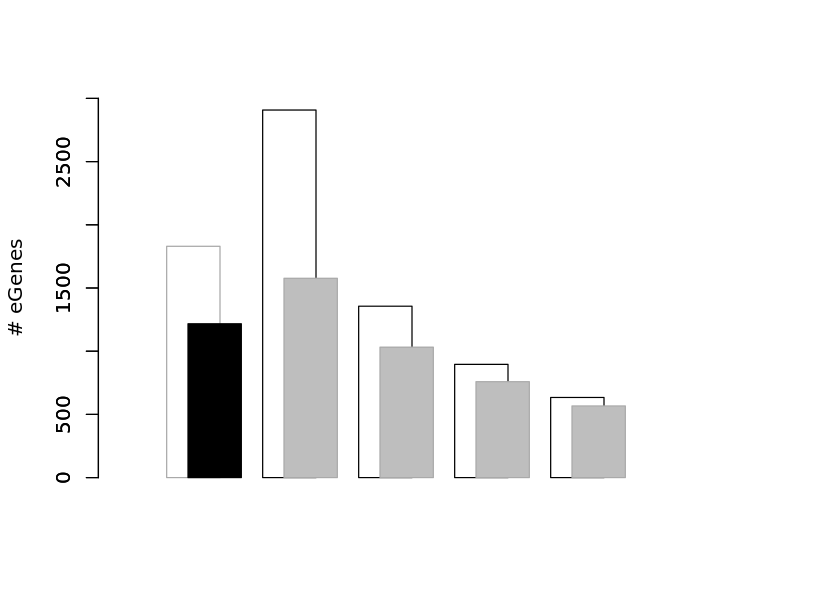

In [33]:
options(repr.plot.width = 7, repr.plot.height = 5)

# y1-values
peptide_total <- c(1830, 2908, 1356, 896, 634)
# y2-values
peptide_unique <- c(1217, 1577, 1032, 759, 567)

# determine ymax (from y1-values)
ymax <- peptide_total[which.max(peptide_total)]

# assign vector of midpoint-values of first barplot (y1) to x 
x <- barplot(peptide_total, border = c('darkgray','black', 'black','black','black'), 
             col = 'white', xlim = c(0, 6), ylim = c(0, 3000), space = 0.8,
             width = 0.5, ylab = "# eGenes")

par(new = TRUE)

barplot(peptide_unique,  border = c('black', 'darkgray','darkgray','darkgray','darkgray'), 
        col = c('black', 'gray','gray','gray','gray'),
        xlim = c(-0.2, 5.8), ylim = c(0, 3000),
        width = 0.5, space = 0.8, axisnames = FALSE)

In [ ]:
######## get complete set of results

In [1]:
allres <- read.csv("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/interactions/alldays/all_results_combined.csv",row.names = 1)

In [2]:
nrow(allres)

[1] 4824

In [3]:
head(allres)

,beta.mean,beta_se,empirical_feature_p_value,p_value.mean,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,⋯,permutation_7,permutation_8,permutation_9,stage,sign.mean,stage_specific,p_value.int,q_value,beta.int,sign.int
24,-1.386281,0.1083733,1.592971e-18,1.823854e-37,6_31132414_G_A,ENSG00000204531_POU5F1,5.264237e-16,6,31132414,G,⋯,0.7882827,0.27434634,0.8380203,ips,TRUE,FALSE,2.225074e-308,1.184094e-305,0.017999188,TRUE
117,-1.270786,0.1469673,1.977147e-11,5.299864e-18,6_32634922_A_G,ENSG00000179344_HLA-DQB1,1.340269e-09,6,32634922,A,⋯,0.6356307,0.65583848,0.7961894,ips,TRUE,FALSE,2.225074e-308,1.184094e-305,-0.014912210,TRUE
1867,-1.375988,0.1478612,8.485500e-15,1.328104e-20,6_32634922_A_G,ENSG00000179344_HLA-DQB1,1.519887e-12,6,32634922,A,⋯,0.9319215,0.48339261,0.5968726,mesendo,TRUE,FALSE,2.225074e-308,1.184094e-305,-0.014912210,TRUE
3552,-1.438379,0.1499301,3.298243e-12,8.500689e-22,6_32634922_A_G,ENSG00000179344_HLA-DQB1,5.981274e-10,6,32634922,A,⋯,0.5407123,0.57628089,0.2056868,defendo,TRUE,FALSE,2.225074e-308,1.184094e-305,-0.014912210,TRUE
20,-1.371767,0.1094063,1.461609e-19,4.608624e-36,9_136227260_A_G,ENSG00000148291_SURF2,5.796154e-17,9,136227260,A,⋯,0.2871386,0.02864323,0.5149517,ips,TRUE,FALSE,1.630308e-200,5.783893e-198,0.009027511,TRUE
1840,-1.410832,0.1143974,6.363028e-20,6.036677e-35,9_136227260_A_G,ENSG00000148291_SURF2,2.949861e-17,9,136227260,A,⋯,0.1916902,0.52999153,0.8323928,mesendo,TRUE,FALSE,1.630308e-200,5.783893e-198,0.009027511,TRUE


In [4]:
df = allres[,c("snp_id","feature")]
head(df)

,snp_id,feature
24,6_31132414_G_A,ENSG00000204531_POU5F1
117,6_32634922_A_G,ENSG00000179344_HLA-DQB1
1867,6_32634922_A_G,ENSG00000179344_HLA-DQB1
3552,6_32634922_A_G,ENSG00000179344_HLA-DQB1
20,9_136227260_A_G,ENSG00000148291_SURF2
1840,9_136227260_A_G,ENSG00000148291_SURF2


In [5]:
myfile = "/nfs/leia/research/stegle/acuomo/singlecell_endodiff/data/exploratory_analysis/input_files/full_sc_exprs_merged_leads.tsv"

In [6]:
write.table(df,myfile,sep = "\t", quote = F, row.names = F)

In [18]:
### add gene start, gene end, strand info from sceset

In [52]:
# sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [58]:
df_geneinfo = as.data.frame(cbind(rownames(sce),rowData(sce)))
colnames(df_geneinfo)[1] <- "feature"
head(df_geneinfo)

feature,exprs_collapsed_to,ensembl_transcript_id,ensembl_gene_id,hgnc_symbol,chromosome_name,start_position,end_position,gene_biotype,feature_symbol,feature_id,is_feature_control,is_intop100hvg,is_intop200hvg,is_intop500hvg,is_intop1000hvg,is_intop2000hvg,is_hvg
ENSG00000000003_TSPAN6,ENSG00000000003,ENST00000373020,ENSG00000000003,TSPAN6,X,99883667,99894988,protein_coding,TSPAN6,ENSG00000000003,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000419_DPM1,ENSG00000000419,ENST00000371588,ENSG00000000419,DPM1,20,49551404,49575092,protein_coding,DPM1,ENSG00000000419,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000457_SCYL3,ENSG00000000457,ENST00000367771,ENSG00000000457,SCYL3,1,169818772,169863408,protein_coding,SCYL3,ENSG00000000457,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000000460_C1orf112,ENSG00000000460,ENST00000498289,ENSG00000000460,C1orf112,1,169631245,169823221,protein_coding,C1orf112,ENSG00000000460,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001036_FUCA2,ENSG00000001036,ENST00000002165,ENSG00000001036,FUCA2,6,143815948,143832827,protein_coding,FUCA2,ENSG00000001036,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
ENSG00000001084_GCLC,ENSG00000001084,ENST00000509541,ENSG00000001084,GCLC,6,53362139,53481768,protein_coding,GCLC,ENSG00000001084,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [59]:
extra_gene_info_filename = "/nfs/leia/research/stegle/dseaton/genomes/hg19/annotation/Homo_sapiens.GRCh37.75.genes.bed"
extra_gene_info = read.table(extra_gene_info_filename)
colnames(extra_gene_info) = c("chromosome_name","start_position","end_position","ensembl_gene_id","gene_biotype","strand")
head(extra_gene_info)

In [64]:
df_geneinfo1 = inner_join(df_geneinfo, extra_gene_info, by = c("ensembl_gene_id","chromosome_name","gene_biotype"))
head(df_geneinfo1)

feature,exprs_collapsed_to,ensembl_transcript_id,ensembl_gene_id,hgnc_symbol,chromosome_name,start_position.x,end_position.x,gene_biotype,feature_symbol,⋯,is_feature_control,is_intop100hvg,is_intop200hvg,is_intop500hvg,is_intop1000hvg,is_intop2000hvg,is_hvg,start_position.y,end_position.y,strand
ENSG00000000003_TSPAN6,ENSG00000000003,ENST00000373020,ENSG00000000003,TSPAN6,X,99883667,99894988,protein_coding,TSPAN6,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,99883666,99894988,-
ENSG00000000419_DPM1,ENSG00000000419,ENST00000371588,ENSG00000000419,DPM1,20,49551404,49575092,protein_coding,DPM1,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,49551403,49575092,-
ENSG00000000457_SCYL3,ENSG00000000457,ENST00000367771,ENSG00000000457,SCYL3,1,169818772,169863408,protein_coding,SCYL3,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,169818771,169863408,-
ENSG00000000460_C1orf112,ENSG00000000460,ENST00000498289,ENSG00000000460,C1orf112,1,169631245,169823221,protein_coding,C1orf112,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,169631244,169823221,+
ENSG00000001036_FUCA2,ENSG00000001036,ENST00000002165,ENSG00000001036,FUCA2,6,143815948,143832827,protein_coding,FUCA2,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,143815947,143832827,-
ENSG00000001084_GCLC,ENSG00000001084,ENST00000509541,ENSG00000001084,GCLC,6,53362139,53481768,protein_coding,GCLC,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,53362138,53481768,-


In [65]:
allres = inner_join(allres, df_geneinfo1, by = "feature")
nrow(allres)

[1] 4824

In [127]:
allres[allres$strand == "+","TSS"] = allres[allres$strand == "+","start_position.y"]
allres[allres$strand == "-","TSS"] = allres[allres$strand == "-","end_position.y"]
allres[allres$strand == "+","dist"] = allres[allres$strand == "+","pos"] - allres[allres$strand == "+","TSS"]
allres[allres$strand == "-","dist"] = - allres[allres$strand == "-","pos"] + allres[allres$strand == "-","TSS"]

In [128]:
######## define 4 eQTL clusters
# stage-specific ips
# stage-specific mesendo
# stage-specific defendo
# non stage-specific 

In [129]:
allres_ss_ips = allres[allres$stage_specific == T & allres$stage == "ips" ,]
nrow(allres_ss_ips)

[1] 365

In [130]:
allres_ss_me = allres[allres$stage_specific == T & allres$stage == "mesendo" ,]
nrow(allres_ss_me)

[1] 374

In [131]:
allres_ss_de = allres[allres$stage_specific == T & allres$stage == "defendo" ,]
nrow(allres_ss_de)

[1] 361

In [132]:
allres_non_ss = allres[allres$stage_specific == F ,]
nrow(allres_non_ss)

[1] 3724

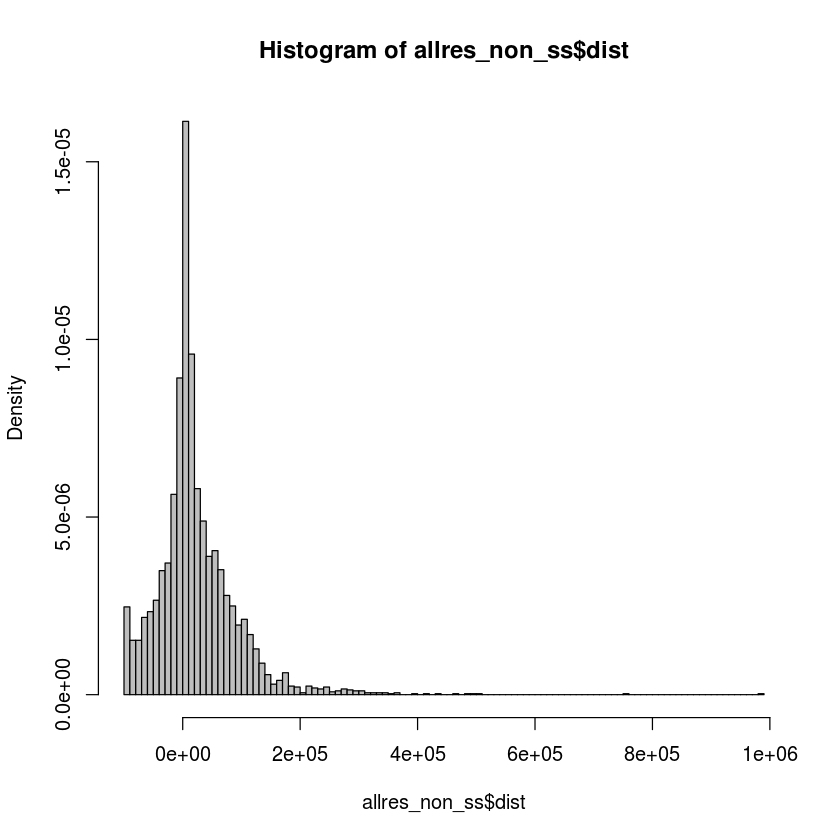

In [135]:
hist(allres_non_ss$dist, breaks = 100, col = "grey", probability = T)

In [148]:
HistDensity <- function(x, col){
    h = hist(x, breaks = 1000, col = col, probability = T, xlim = c(min(x),-min(x)))
    xfit <- seq(min(x), max(x), length = 40) 
    yfit <- dnorm(xfit, mean = mean(x),sd = sd(x)) 
    yfit <- yfit*diff(h$mids[1:2])*length(x) 
    plot(lines(xfit, yfit, col = col, lwd = 2))
}

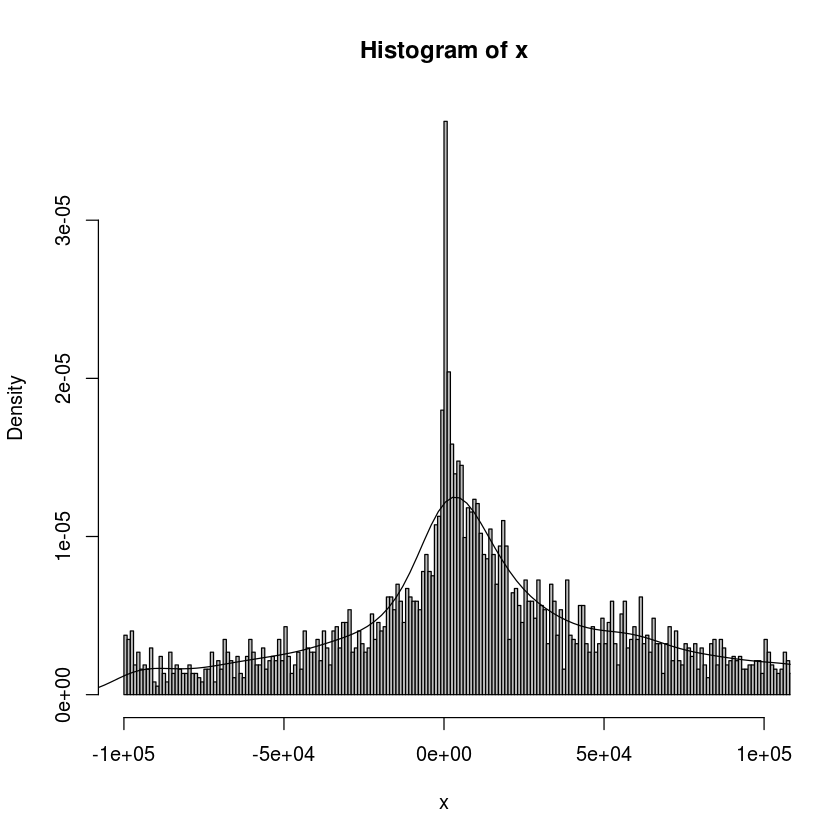

In [163]:
x = allres_non_ss$dist
# x = allres_ss_de$dist
col = "grey"
hist(x, breaks = 1000, col = col,  prob = T, xlim = c(min(x),-min(x)))
den = density(x)
lines(den)

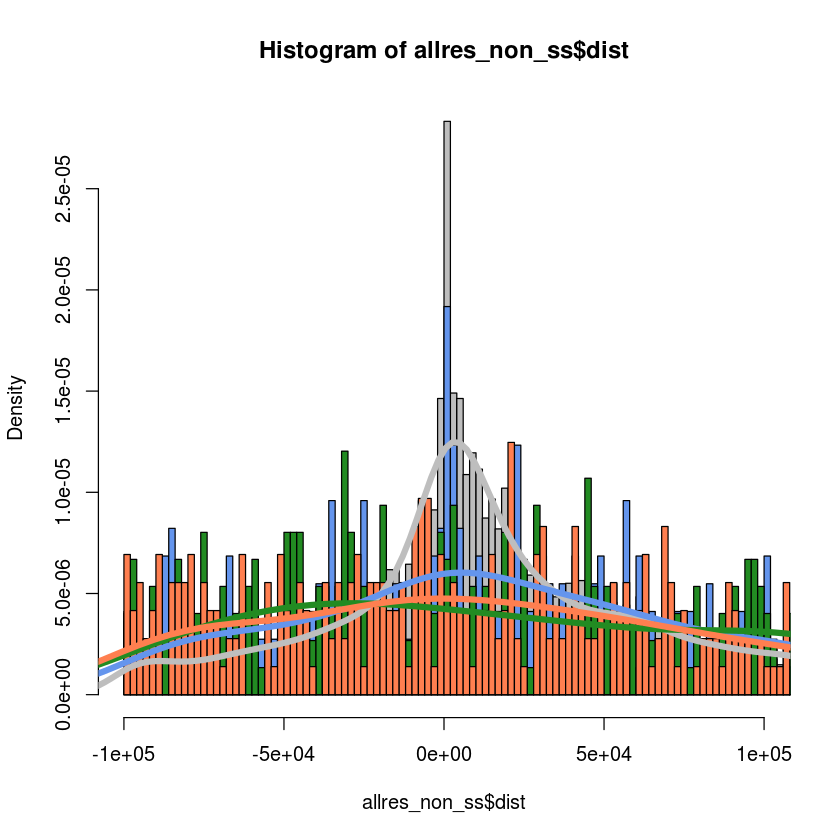

In [185]:
hist(allres_non_ss$dist, breaks = 500, probability = T, col = "grey",
         xlim = c(min(allres_non_ss$dist),-min(allres_non_ss$dist)))
hist(allres_ss_ips$dist, breaks = 500, add = T, col = "cornflowerblue", probability = T)
hist(allres_ss_me$dist, breaks = 800, add = T, col = "forestgreen", probability = T)
hist(allres_ss_de$dist, breaks = 1000, add = T, col = "coral", probability = T)
lines(density(allres_non_ss$dist), col = "grey", lwd = 5)
lines(density(allres_ss_ips$dist), col = "cornflowerblue", lwd = 5)
lines(density(allres_ss_me$dist), col = "forestgreen", lwd = 5)
lines(density(allres_ss_de$dist), col = "coral", lwd = 5)

In [9]:
RankAndKeepTop <- function(leads){
    leads1 = leads[order(leads$global_corr_p_value),]
    leads2 = leads1[-which(duplicated(leads1$feature)),]  
    leads2
}

In [24]:
### inner join significant sc iPS leads, all results from sc mesendo leads
leads.ips.in.me = left_join(leads.ips.sign, res.mes, by = c("snp_id","feature"), 
                            suffix = c(".ips",".me"))
# nrow(leads.ips.in.me)
leads.ips.in.me = RankAndKeepTop(leads.ips.in.me)
# nrow(leads.ips.in.me)
### inner join significant sc iPS leads and mesenso, all results from sc defendo leads
leads.ips.in.me.in.de = left_join(leads.ips.in.me, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# colnames(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
leads.ips.in.me.in.de = RankAndKeepTop(leads.ips.in.me.in.de)
# nrow(leads.ips.in.me.in.de)
ips = leads.ips.in.me.in.de
ips$p_value.de = ips$p_value
ips$beta.de = ips$beta
ips = ips[!(is.na(ips$p_value.me)) & !(is.na(ips$p_value.de)),]
nrow(ips[(ips$p_value.me >= 0.05) & (ips$p_value.de >= 0.05),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)),])
nrow(ips[((ips$p_value.de >= 0.05) & (ips$p_value.me < 0.05)),])
nrow(ips[((ips$p_value.me >= 0.05) & (ips$p_value.de < 0.05)) | ((ips$p_value.me < 0.05) & (ips$p_value.de >= 0.05)),])
nrow(ips[(ips$p_value.me < 0.05) & (ips$p_value.de < 0.05),])

[1] 468

[1] 182

[1] 287

[1] 469

[1] 681

In [33]:
### inner join significant sc mesendo leads, all results from sc iPSC leads
leads.me.in.ips = left_join(leads.mes.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".me",".ips"))
# nrow(leads.me.in.ips)
leads.me.in.ips = RankAndKeepTop(leads.me.in.ips)
nrow(leads.me.in.ips)
# ### inner join significant sc mesendo leads and iPS, all results from sc defendo leads
leads.me.in.ips.in.de = left_join(leads.me.in.ips, res.defendo, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.me.in.ips.in.de)
leads.me.in.ips.in.de = RankAndKeepTop(leads.me.in.ips.in.de)
# # nrow(leads.me.in.ips.in.de)
mesendo = leads.me.in.ips.in.de
mesendo$p_value.de = mesendo$p_value
mesendo$beta.de = mesendo$beta
mesendo = mesendo[!(is.na(mesendo$p_value.ips)) & !(is.na(mesendo$p_value.de)),]
nrow(mesendo[(mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de >= 0.05),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)),])
nrow(mesendo[((mesendo$p_value.de >= 0.05) & (mesendo$p_value.ips < 0.05)),])
nrow(mesendo[((mesendo$p_value.ips >= 0.05) & (mesendo$p_value.de < 0.05)) | ((mesendo$p_value.ips < 0.05) & (mesendo$p_value.de >= 0.05)),])
nrow(mesendo[(mesendo$p_value.ips < 0.05) & (mesendo$p_value.de < 0.05),])

[1] 1679

[1] 455

[1] 100

[1] 278

[1] 378

[1] 592

In [35]:
### inner join significant sc defendo leads, all results from sc iPSC leads
leads.de.in.ips = left_join(leads.defendo.sign, res.ips, by = c("snp_id","feature"), 
                            suffix = c(".de",".ips"))
# nrow(leads.de.in.ips)
leads.de.in.ips = RankAndKeepTop(leads.de.in.ips)
nrow(leads.de.in.ips)
# ### inner join significant sc defendo leads and iPS, all results from sc mesendo leads
leads.de.in.ips.in.me = left_join(leads.de.in.ips, res.mes, by = c("snp_id","feature","ensembl_gene_id"))
# # nrow(leads.de.in.ips.in.me)
leads.de.in.ips.in.me = RankAndKeepTop(leads.de.in.ips.in.me)
# # nrow(leads.de.in.ips.in.me)
defendo = leads.de.in.ips.in.me
defendo$p_value.me = defendo$p_value
defendo$beta.me = defendo$beta
defendo = defendo[!(is.na(defendo$p_value.ips)) & !(is.na(defendo$p_value.me)),]
nrow(defendo[(defendo$p_value.ips >= 0.05) & (defendo$p_value.me >= 0.05),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)),])
nrow(defendo[((defendo$p_value.me >= 0.05) & (defendo$p_value.ips < 0.05)),])
nrow(defendo[((defendo$p_value.ips >= 0.05) & (defendo$p_value.me < 0.05)) | ((defendo$p_value.ips < 0.05) & (defendo$p_value.me >= 0.05)),])
nrow(defendo[(defendo$p_value.ips < 0.05) & (defendo$p_value.me < 0.05),])

[1] 1322

[1] 435

[1] 115

[1] 138

[1] 253

[1] 590

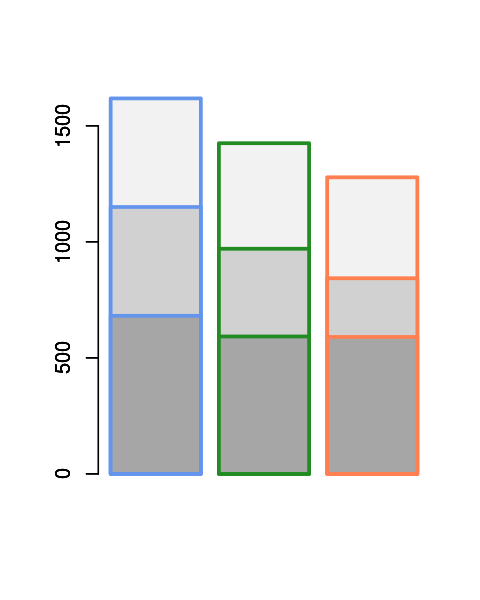

In [4]:
options(repr.plot.width = 4, repr.plot.height = 5)
opar <- par(lwd = 3)
barplot(c(1618,1425,1278), col = "gray95", border = c("cornflowerblue","forestgreen","coral"), axes = 3)
barplot(c(1150,970,843), col = "gray82", border = c("cornflowerblue","forestgreen","coral"), add = T)
barplot(c(681,592,590), col = "gray65", border = c("cornflowerblue","forestgreen","coral"), add = T)

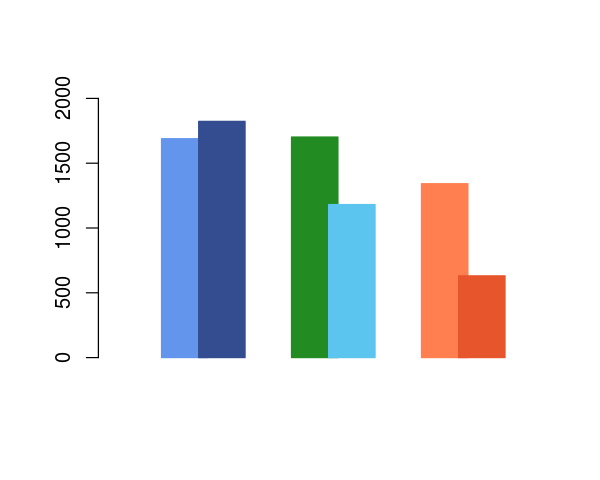

In [17]:
options(repr.plot.width = 5, repr.plot.height = 4)
eqtls <- c(1689, 1823, 1702, 1181, 1342, 631)


my.xlim = c(0, 2000)
my.ylim = c(0,9)
my.space = c(1, -0.2, 1, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
        border = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
#         col = "white",
        col = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


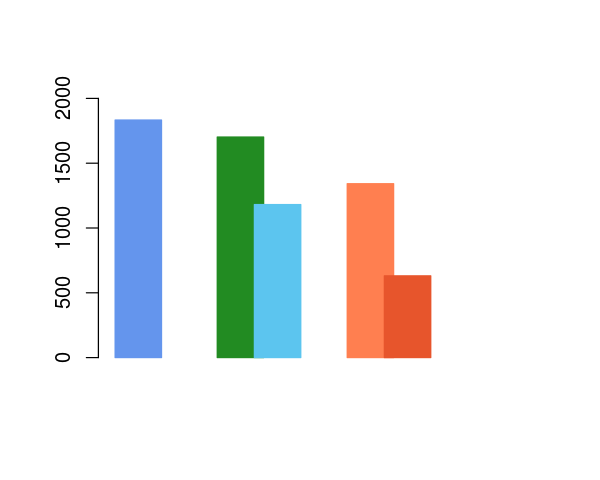

In [13]:
options(repr.plot.width = 5, repr.plot.height = 4)
eqtls <- c(1833, 1702, 1181, 1342, 631)


my.xlim = c(0, 2000)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
        border = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
#         col = "white",
        col = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


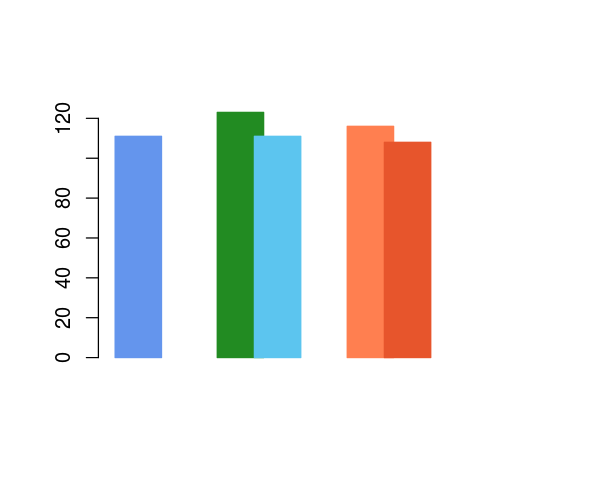

In [15]:
options(repr.plot.width = 5, repr.plot.height = 4)
eqtls <- c(111, 123, 111, 116, 108)


my.xlim = c(0, 130)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
        border = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
#         col = "white",
        col = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


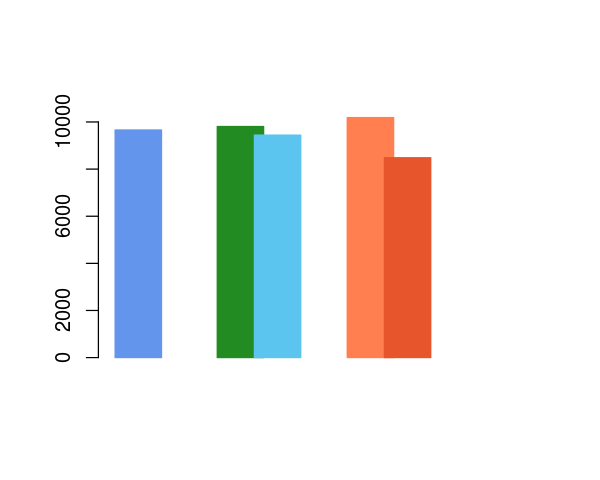

In [18]:
options(repr.plot.width = 5, repr.plot.height = 4)
eqtls <- c(9661, 9809, 9443, 10187, 8485)


my.xlim = c(0, 11000)
my.ylim = c(0,9)
my.space = c(0, 1.2, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
        border = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
#         col = "white",
        col = c("cornflowerblue","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


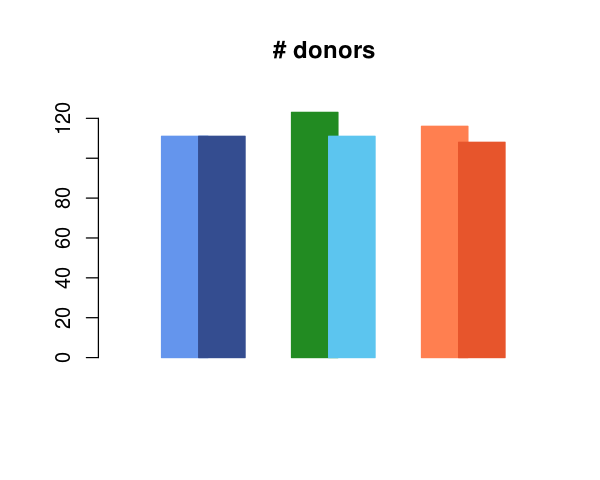

In [22]:
options(repr.plot.width = 5, repr.plot.height = 4)
ndonors <- c(111, 111, 123, 111, 116, 108)


my.xlim = c(0, 130)
my.ylim = c(0,9)
my.space = c(1, -0.2, 1, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(ndonors), 
        border = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
        main = "# donors",
        col = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


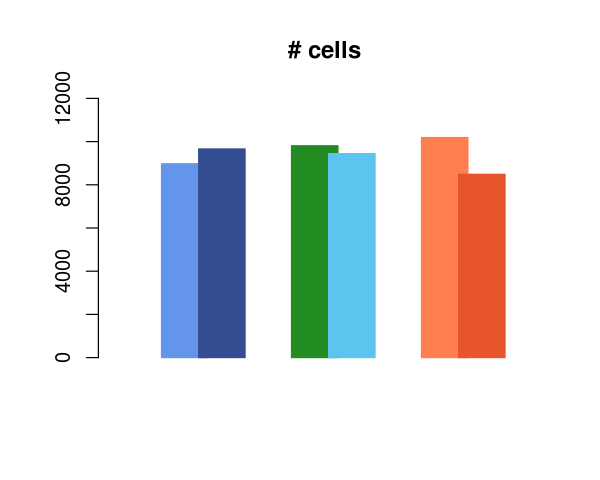

In [21]:
options(repr.plot.width = 5, repr.plot.height = 4)
ncells <- c(8975, 9661, 9809, 9443, 10187, 8485)


my.xlim = c(0, 12000)
my.ylim = c(0,9)
my.space = c(1, -0.2, 1, -0.2, 1, -0.2)

# opar <- par(lwd = 5)
barplot(as.numeric(ncells), 
        border = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
        main = "# cells",
        col = c("cornflowerblue","#344d90","forestgreen","#5cc5ef","coral","#e7552c"),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [61]:
head(leads.ips[order(leads.ips$beta_se, decreasing = T),])

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,⋯,permutation_0,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9
7108,0.6910577,0.2963191,0.4871127,0.019693295,19_9543029_T_C,ENSG00000198028_ZNF560,0.5462934,19,9543029,T,⋯,0.1541506,0.5175415,0.9562556,0.7431758,0.76562412,0.36646707,0.257191351,0.03863695,0.1546573,0.8243845
4784,0.8771410,0.2754646,0.2358132,0.001451427,16_3584179_C_T,ENSG00000213918_DNASE1,0.3927271,16,3584179,C,⋯,0.6749108,0.8459454,0.2738550,0.3906664,0.46883778,0.70045289,0.779539706,0.56896339,0.8558725,0.5002487
5250,-0.7777305,0.2731496,0.2771594,0.004409605,5_66562959_T_G,ENSG00000069020_MAST4,0.4207487,5,66562959,T,⋯,0.1749404,0.7329226,0.5050498,0.8806061,0.49002732,0.57127599,0.717410258,0.32455003,0.9555014,0.6724838
8526,0.8217682,0.2726208,0.6785954,0.002575505,18_337772_C_T,ENSG00000158270_COLEC12,0.6342297,18,337772,C,⋯,0.8323326,0.5907101,0.7706685,0.7588036,0.84954315,0.10791987,0.201250652,0.62721635,0.7916897,0.8673307
6680,0.7456408,0.2710958,0.4340096,0.005950991,13_87806627_T_C,ENSG00000228074_UBBP5,0.5177381,13,87806627,T,⋯,0.3147502,0.5258217,0.1721190,0.1032176,0.80890203,0.03007898,0.006055945,0.44171234,0.5876194,0.3869616
9654,0.5995519,0.2683877,0.8405894,0.025489506,15_57295579_A_G,ENSG00000137871_ZNF280D,0.6936783,15,57295579,A,⋯,0.8788225,0.2689960,0.8279418,0.5946146,0.08173995,0.05604315,0.145470508,0.86425179,0.8514078,0.2377929


In [13]:
ips.leads.filename = "/nfs/leia/research/stegle/acuomo/mean/ips/top_qtl_results_all.txt"
ips.leads = read.csv(ips.leads.filename, sep = "\t")
ips.leads$q_value = qvalue(ips.leads$empirical_feature_p_value)$qvalues
head(ips.leads)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,hgnc_symbol,⋯,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_pvalue,q_value,corr_p_value
ENSG00000151458_ANKRD50,4_125553820_T_G,0.020914282,-0.1910640,0.08272860,0.8630794,4,125585207,125633887,ANKRD50,⋯,0.6529995,66.15712,4,125553820,G,1,0.4722222,0.02179236,0.7605815,0.9612832
ENSG00000164066_INTU,4_128602387_C_T,0.031039427,0.1900783,0.08813929,0.7559562,4,128544426,128647892,INTU,⋯,0.6424059,28.59967,4,128602387,T,1,0.4722222,0.25288607,0.7184061,0.9079786
ENSG00000151692_RNF144A,2_7054398_T_A,0.001262123,0.3188678,0.09889041,0.2541533,2,7057523,7208417,RNF144A,⋯,0.7063035,107.88670,2,7054398,A,1,0.3055556,0.49530585,0.4343032,0.5489068
ENSG00000143742_SRP9,1_225958857_C_A,0.019395323,0.1333045,0.05702025,0.7141771,1,225965531,225978168,SRP9,⋯,0.8320435,52.64120,1,225958857,A,1,0.4259259,0.84624924,0.6997050,0.8843426
ENSG00000143768_LEFTY2,1_226159716_G_C,0.005416968,-0.5038272,0.18115901,0.1535369,1,226124298,226129189,LEFTY2,⋯,0.9810266,29.27952,1,226159716,C,1,0.1296296,1.00000000,0.3404450,0.4302814
ENSG00000143811_PYCR2,1_226154862_G_C,0.014343092,-0.2254404,0.09207083,0.5501260,1,226107578,226111978,PYCR2,⋯,0.7931255,40.48560,1,226154862,C,1,0.1481481,1.00000000,0.6223646,0.7865937


In [15]:
nrow(ips.leads[ips.leads$q_value < 0.1,])

[1] 1714